In [9]:
from cv2 import threshold
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

df = pd.read_csv("/home/kathy/NPHdata.csv")
df.dropna(inplace=True, subset=['File Name'])
df

thresholds = list(range(4079, 169960, 1659))
print(thresholds)

[4079, 5738, 7397, 9056, 10715, 12374, 14033, 15692, 17351, 19010, 20669, 22328, 23987, 25646, 27305, 28964, 30623, 32282, 33941, 35600, 37259, 38918, 40577, 42236, 43895, 45554, 47213, 48872, 50531, 52190, 53849, 55508, 57167, 58826, 60485, 62144, 63803, 65462, 67121, 68780, 70439, 72098, 73757, 75416, 77075, 78734, 80393, 82052, 83711, 85370, 87029, 88688, 90347, 92006, 93665, 95324, 96983, 98642, 100301, 101960, 103619, 105278, 106937, 108596, 110255, 111914, 113573, 115232, 116891, 118550, 120209, 121868, 123527, 125186, 126845, 128504, 130163, 131822, 133481, 135140, 136799, 138458, 140117, 141776, 143435, 145094, 146753, 148412, 150071, 151730, 153389, 155048, 156707, 158366, 160025, 161684, 163343, 165002, 166661, 168320]
100


In [2]:
from re import A
import numpy as np

res = {}

list_tp, list_fn, list_fp, list_tn = [], [], [], []

for threshold in thresholds:
    list_tp.append(0)
    list_fn.append(0)
    list_fp.append(0)
    list_tn.append(0)
    for index, instance in df.iterrows():
        actual = instance["Has NPH?"]
        prediction = instance["Manual Threshold - Voxel Count"]
        pred = True if instance['Voxel Count'] > threshold else False
        res.setdefault(threshold, []).append(pred)

        if actual == "TRUE" and pred == True:
            list_tp[-1] += 1
        elif actual == "FALSE" and pred == False:
            list_tn[-1] += 1
        elif actual == "TRUE" and pred == False:
            list_fn[-1] += 1
        elif actual == "FALSE" and pred  == True:
            list_fp[-1] += 1


In [10]:
list_tpr = []
list_fpr = []
for i in range(len(list_fp)):
    list_tpr.append(list_tp[i]/(list_tp[i]+list_fn[i]))
    list_fpr.append(list_fp[i]/(list_tn[i]+list_fp[i]))

[0.9795918367346939,
 0.9795918367346939,
 0.9591836734693877,
 0.9387755102040817,
 0.8979591836734694,
 0.8979591836734694,
 0.8571428571428571,
 0.7551020408163265,
 0.7142857142857143,
 0.673469387755102,
 0.6530612244897959,
 0.6530612244897959,
 0.5918367346938775,
 0.5918367346938775,
 0.5102040816326531,
 0.4897959183673469,
 0.4897959183673469,
 0.46938775510204084,
 0.3877551020408163,
 0.3673469387755102,
 0.30612244897959184,
 0.24489795918367346,
 0.20408163265306123,
 0.20408163265306123,
 0.20408163265306123,
 0.16326530612244897,
 0.14285714285714285,
 0.14285714285714285,
 0.12244897959183673,
 0.08163265306122448,
 0.08163265306122448,
 0.08163265306122448,
 0.08163265306122448,
 0.061224489795918366,
 0.04081632653061224,
 0.04081632653061224,
 0.02040816326530612,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

0.9186765615337043

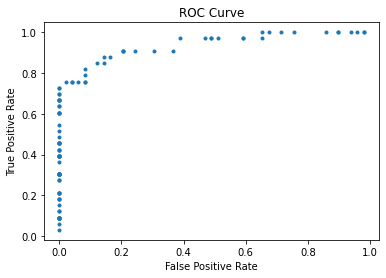

In [4]:
import matplotlib.pyplot as plt
from sklearn import metrics

plt.plot(list_fpr, list_tpr, ".")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

metrics.auc(list_fpr, list_tpr)

In [5]:
#metrics

list_indices = []
list_thresholds = []
list_accuracies = []
list_precisions = []
list_recalls = []
list_specificities = []


for i in range(len(list_tp)):

    list_indices.append(i)

    accuracy = (list_tp[i] + list_tn[i]) / (list_tn[i] + list_fn[i] + list_fp[i] + list_tp[i])
    list_accuracies.append(accuracy)

    precision = (list_tp[i]/(list_fp[i]+list_tp[i]))
    list_precisions.append(precision)

    recall = (list_tp[i]/(list_fn[i]+list_tp[i]))
    list_recalls.append(recall)

    specificity = (list_tn[i]/(list_fp[i]+list_tn[i]))
    list_specificities.append(specificity)


print("Indices: " + str(list_indices))

print("Accuracy: " + str(list_accuracies))

print("Precision: " + str(list_precisions))

print("Recall: " + str(list_recalls))

print("Specificity: " + str(list_specificities))

Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Accuracy: [0.4146341463414634, 0.4146341463414634, 0.4268292682926829, 0.43902439024390244, 0.4634146341463415, 0.4634146341463415, 0.4878048780487805, 0.5487804878048781, 0.573170731707317, 0.5975609756097561, 0.6097560975609756, 0.5975609756097561, 0.6341463414634146, 0.6341463414634146, 0.6829268292682927, 0.6951219512195121, 0.6951219512195121, 0.7073170731707317, 0.7560975609756098, 0.7439024390243902, 0.7804878048780488, 0.8170731707317073, 0.8414634146341463, 0.8414634146341463, 0.8414634146341463, 0.8536585365853658, 0.8658536585365854, 0.8536585365853658, 0.8658536585365854, 0.8780487

In [6]:
str(list_fpr)

'[0.9795918367346939, 0.9795918367346939, 0.9591836734693877, 0.9387755102040817, 0.8979591836734694, 0.8979591836734694, 0.8571428571428571, 0.7551020408163265, 0.7142857142857143, 0.673469387755102, 0.6530612244897959, 0.6530612244897959, 0.5918367346938775, 0.5918367346938775, 0.5102040816326531, 0.4897959183673469, 0.4897959183673469, 0.46938775510204084, 0.3877551020408163, 0.3673469387755102, 0.30612244897959184, 0.24489795918367346, 0.20408163265306123, 0.20408163265306123, 0.20408163265306123, 0.16326530612244897, 0.14285714285714285, 0.14285714285714285, 0.12244897959183673, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.061224489795918366, 0.04081632653061224, 0.04081632653061224, 0.02040816326530612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [7]:
str(list_tpr)

'[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.8787878787878788, 0.8787878787878788, 0.8484848484848485, 0.8484848484848485, 0.8181818181818182, 0.7878787878787878, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7272727272727273, 0.7272727272727273, 0.696969696969697, 0.696969696969697, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6363636363636364, 0.6363636363636364, 0.6060606060606061, 0.6060606060606061, 0.6060606060606061, 0.6060606060606061, 0.5454545454545454, 0.5151515151515151, 0.48484848484848486, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 